# Pandas: Extremely powerful version of excel in python

Uses of Pandas:
1. Loading
2. Preparing
3. Manipulating
4. Modelling
5. Analyzing data


######  Raw Data (in csvs, xlsx) --------> Import raw data to pandas ---------> Ana;yze, Manipulate, Process, Do the data science

#### Series

Array + Label = Series

In [1]:
### Creating series usinmg numpy array

import numpy as np
import pandas as pd

In [2]:
porosities = np.array([0.25,0.31,0.10])

In [3]:
porosities

array([0.25, 0.31, 0.1 ])

In [4]:
## pd.series(array, index = ,dtype)

In [10]:
poro_series = pd.Series(data = porosities,index = ["panna","vovle","Oilfield 3"],name = 'Porosities')

In [11]:
poro_series

panna         0.25
vovle         0.31
Oilfield 3    0.10
Name: Porosities, dtype: float64

In [22]:
depth_wise_poro_series = pd.Series([0.31,0.27,0.25],index = [1000,1200,2000],name = "PhivsDepth")

In [23]:
depth_wise_poro_series

1000    0.31
1200    0.27
2000    0.25
Name: PhivsDepth, dtype: float64

<AxesSubplot:>

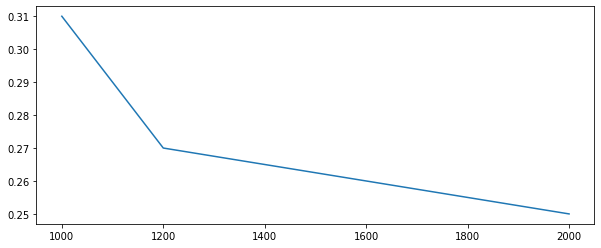

In [24]:
depth_wise_poro_series.plot(figsize = (10,4))

<AxesSubplot:>

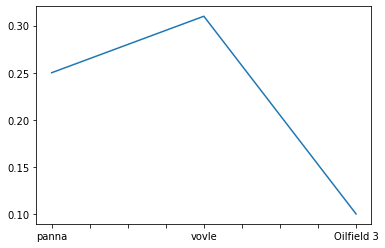

In [18]:
poro_series.plot()

In [25]:
# Creating a series using a dictionary

my_fields_perms = {'rockA': 120,'rockB':100,'rockC':80}

In [26]:
my_fields_perms

{'rockA': 120, 'rockB': 100, 'rockC': 80}

In [27]:
my_fields_perms_series = pd.Series(data = my_fields_perms,name = 'DictToseries')

In [28]:
my_fields_perms_series

rockA    120
rockB    100
rockC     80
Name: DictToseries, dtype: int64

<AxesSubplot:>

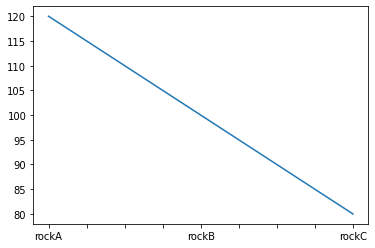

In [29]:
my_fields_perms_series.plot()

<AxesSubplot:>

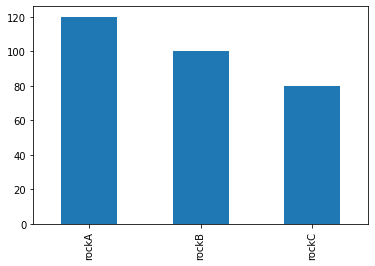

In [30]:
my_fields_perms_series.plot(kind= 'bar')

### Dataframe:

- We can think of a DataFrame as a bunch of Series objects put together to share same index

So, basically:

Lists, Tuples, Dictionaries, Sets = > Core python  DS

Numpy array => it is the most basic brick

Numpy arrays+ Labels/Index = Series

Multiple Series stacked together + Common index = Pandas DataFrame

DF looks like a table

In [31]:
## DF from 2d numpy  + Row labels, Column Labels to make a df

In [32]:
my_perms = np.random.randint(10,500,(3,3))

In [33]:
my_perms

array([[ 70, 349,  22],
       [ 64, 217, 313],
       [290, 246, 150]])

In [36]:
pd.DataFrame(data = my_perms)

,0,1,2
0,70,349,22
1,64,217,313
2,290,246,150


In [37]:
pd.DataFrame(data = my_perms,index = ['R1','R2','R3'])


,0,1,2
R1,70,349,22
R2,64,217,313
R3,290,246,150


In [39]:
pd.DataFrame(data = my_perms,columns=['C1','C2','C3'])

,C1,C2,C3
0,70,349,22
1,64,217,313
2,290,246,150


In [44]:
pd.DataFrame(data = my_perms,index = ['R1','R2','R3'],columns=('C1','C2','C3'))

,C1,C2,C3
R1,70,349,22
R2,64,217,313
R3,290,246,150


In [46]:
common_depth_index = [1000,1500,2000]

poro_series = pd.Series([0.35,0.31,0.25],index=common_depth_index)

perm_series = pd.Series([35,31,25],index=common_depth_index)

In [49]:
poro_series

1000    0.35
1500    0.31
2000    0.25
dtype: float64

In [48]:
perm_series

1000    35
1500    31
2000    25
dtype: int64

In [52]:
df_rock = pd.DataFrame([poro_series,perm_series]).T

In [53]:
df_rock

,0,1
1000,0.35,35.0
1500,0.31,31.0
2000,0.25,25.0


In [54]:
df_rock.columns = ['porosity','Permeability']

In [55]:
df_rock

,porosity,Permeability
1000,0.35,35.0
1500,0.31,31.0
2000,0.25,25.0


In [56]:
df_rock.columns = ['prs','Pm']

In [57]:
df_rock

,prs,Pm
1000,0.35,35.0
1500,0.31,31.0
2000,0.25,25.0


In [86]:
#### Creating a DF using dictionary

my_field_data = {'depth':[1000,1500,2000],'poro(%)':[35,40,25],'Pem(mD)':[500,450,150]}

In [87]:
my_field_data

{'depth': [1000, 1500, 2000],
 'poro(%)': [35, 40, 25],
 'Pem(mD)': [500, 450, 150]}

In [88]:
df = pd.DataFrame(my_field_data)

In [89]:
df

,depth,poro(%),Pem(mD)
0,1000,35,500
1,1500,40,450
2,2000,25,150


In [90]:
## Change index

df.index = my_field_data['depth']

In [91]:
df


,depth,poro(%),Pem(mD)
1000,1000,35,500
1500,1500,40,450
2000,2000,25,150


In [92]:
df.drop('depth',axis = 1)

,poro(%),Pem(mD)
1000,35,500
1500,40,450
2000,25,150


In [94]:
# Removing a column, droping a column

df_wo_depth = df.drop('depth',axis = 1)

In [95]:
df

,depth,poro(%),Pem(mD)
1000,1000,35,500
1500,1500,40,450
2000,2000,25,150


In [96]:
df_wo_depth

,poro(%),Pem(mD)
1000,35,500
1500,40,450
2000,25,150


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

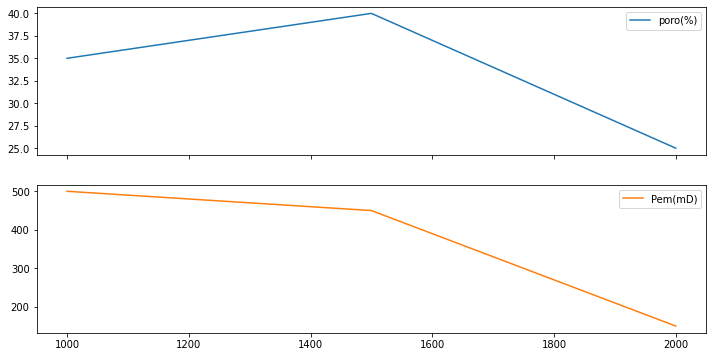

In [82]:
df.plot(figsize = (12,6),subplots = True)

## Accessing Column and Rows 

In [97]:
df

,depth,poro(%),Pem(mD)
1000,1000,35,500
1500,1500,40,450
2000,2000,25,150


In [98]:
## Accessing a column

df['poro(%)']

1000    35
1500    40
2000    25
Name: poro(%), dtype: int64

In [99]:
type(df['poro(%)'])

pandas.core.series.Series

<AxesSubplot:>

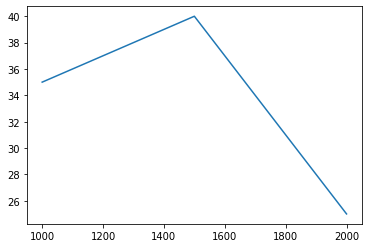

In [100]:
df['poro(%)'].plot()

In [101]:
df.columns

Index(['depth', 'poro(%)', 'Pem(mD)'], dtype='object')

In [102]:
df

,depth,poro(%),Pem(mD)
1000,1000,35,500
1500,1500,40,450
2000,2000,25,150


In [106]:
df[['poro(%)','Pem(mD)']]

,poro(%),Pem(mD)
1000,35,500
1500,40,450
2000,25,150


In [107]:
list_of_col_to_be_accesed = ['poro(%)','Pem(mD)']

df[list_of_col_to_be_accesed]

,poro(%),Pem(mD)
1000,35,500
1500,40,450
2000,25,150


In [109]:
df['poro(%)']

1000    35
1500    40
2000    25
Name: poro(%), dtype: int64

In [110]:
df[['poro(%)']]

,poro(%)
1000,35
1500,40
2000,25


In [111]:
## Creating  New Columns 

df['Swi'] = [0.2,0.3,0.4] 

In [112]:
df

,depth,poro(%),Pem(mD),Swi
1000,1000,35,500,0.2
1500,1500,40,450,0.3
2000,2000,25,150,0.4


In [113]:
df['Swi_perc'] = df['Swi']*100

In [114]:
df

,depth,poro(%),Pem(mD),Swi,Swi_perc
1000,1000,35,500,0.2,20.0
1500,1500,40,450,0.3,30.0
2000,2000,25,150,0.4,40.0


In [115]:
df.columns

Index(['depth', 'poro(%)', 'Pem(mD)', 'Swi', 'Swi_perc'], dtype='object')

In [116]:
df = df[['depth','Pem(mD)', 'poro(%)','Swi', 'Swi_perc']]

In [117]:
df

,depth,Pem(mD),poro(%),Swi,Swi_perc
1000,1000,500,35,0.2,20.0
1500,1500,450,40,0.3,30.0
2000,2000,150,25,0.4,40.0


In [118]:
df.drop(1500,axis = 0)

,depth,Pem(mD),poro(%),Swi,Swi_perc
1000,1000,500,35,0.2,20.0
2000,2000,150,25,0.4,40.0


In [119]:
df

,depth,Pem(mD),poro(%),Swi,Swi_perc
1000,1000,500,35,0.2,20.0
1500,1500,450,40,0.3,30.0
2000,2000,150,25,0.4,40.0


In [120]:
# Accessing Rows: loc, iloc




In [122]:
df.index = ['RockA','RockB','RockC']

In [123]:
df

,depth,Pem(mD),poro(%),Swi,Swi_perc
RockA,1000,500,35,0.2,20.0
RockB,1500,450,40,0.3,30.0
RockC,2000,150,25,0.4,40.0


In [128]:
#Accessing rows using index numbers starting from zero
df.iloc[-1]

depth       2000.0
Pem(mD)      150.0
poro(%)       25.0
Swi            0.4
Swi_perc      40.0
Name: RockC, dtype: float64

In [135]:
df.iloc[[0,2]]

,depth,Pem(mD),poro(%),Swi,Swi_perc
RockA,1000,500,35,0.2,20.0
RockC,2000,150,25,0.4,40.0


In [131]:
## Accessing rows using index names: loc

df.loc[['RockB','RockC']]

,depth,Pem(mD),poro(%),Swi,Swi_perc
RockB,1500,450,40,0.3,30.0
RockC,2000,150,25,0.4,40.0


#### Create a dataframe from the df provided that will have:
rows: RockA and RockC

columns: Perm(md),Poro(%)

In [136]:
df

,depth,Pem(mD),poro(%),Swi,Swi_perc
RockA,1000,500,35,0.2,20.0
RockB,1500,450,40,0.3,30.0
RockC,2000,150,25,0.4,40.0


In [140]:
df.loc[['RockA','RockC']].columns

Index(['depth', 'Pem(mD)', 'poro(%)', 'Swi', 'Swi_perc'], dtype='object')

In [142]:
df.loc[['RockA','RockC']][['poro(%)','Pem(mD)']]

,poro(%),Pem(mD)
RockA,35,500
RockC,25,150


In [143]:
df.iloc[[0,2]][['poro(%)','Pem(mD)']]

,poro(%),Pem(mD)
RockA,35,500
RockC,25,150
